<a href="https://colab.research.google.com/github/adeke910/regression_model/blob/main/Reg_ression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [153]:
import pandas as pd
pd.set_option('display.max_columns',100)

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style('darkgrid')

In [154]:
!wget https://raw.githubusercontent.com/MicrosoftDocs/ml-basics/master/challenges/data/real_estate.csv
real_data= pd.read_csv('real_estate.csv')
real_data.head(5)

--2022-12-26 05:55:05--  https://raw.githubusercontent.com/MicrosoftDocs/ml-basics/master/challenges/data/real_estate.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19949 (19K) [text/plain]
Saving to: ‘real_estate.csv.13’

real_estate.csv.13  100%[===================>]  19.48K  --.-KB/s    in 0.001s  

2022-12-26 05:55:05 (14.4 MB/s) - ‘real_estate.csv.13’ saved [19949/19949]



,transaction_date,house_age,transit_distance,local_convenience_stores,latitude,longitude,price_per_unit
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


Transaction_date - the transaction date (for example, 2013.250=2013 March, 2013.500=2013 June, etc.)

House_age - the house age (in years)

Transit_distance - the distance to the nearest light rail station (in meters)

Local_convenience_stores - the number of convenience stores within walking distance

Latitude - the geographic coordinate, latitude

Longitude - the geographic coordinate, longitude

Price_per_unit house price of unit area (3.3 square meters)

In [155]:
real_data.shape

(414, 7)

In [156]:
real_data.describe()


,transaction_date,house_age,transit_distance,local_convenience_stores,latitude,longitude,price_per_unit
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [157]:
real_data.dtypes

real_data.sample(5)

,transaction_date,house_age,transit_distance,local_convenience_stores,latitude,longitude,price_per_unit
124,2012.917,9.9,279.1726,7,24.97528,121.54541,57.4
409,2013.000,13.7,4082.0150,0,24.94155,121.50381,15.4
233,2013.333,39.7,333.3679,9,24.98016,121.53932,32.4
394,2013.500,32.6,4136.2710,1,24.95544,121.49630,24.7
324,2012.667,12.4,1712.6320,2,24.96412,121.51670,31.3


Distribution of values in each of the price_per_unit column

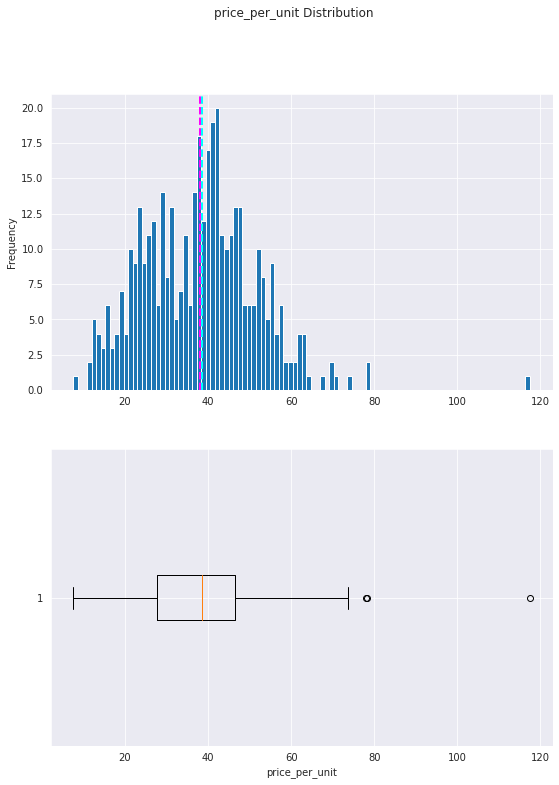

In [158]:
p_p = real_data['price_per_unit']

fig, ax = plt.subplots(2, 1, figsize =(9,12))

ax[0].hist(p_p, bins=100)
ax[0].set_ylabel('Frequency')

ax[0].axvline(p_p.mean(), color='magenta', linestyle='dashed', linewidth=2)
ax[0].axvline(p_p.median(), color='cyan', linestyle='dashed', linewidth=2)

ax[1].boxplot(p_p, vert=False)
ax[1].set_xlabel('price_per_unit')

fig.suptitle('price_per_unit Distribution')

fig.show()

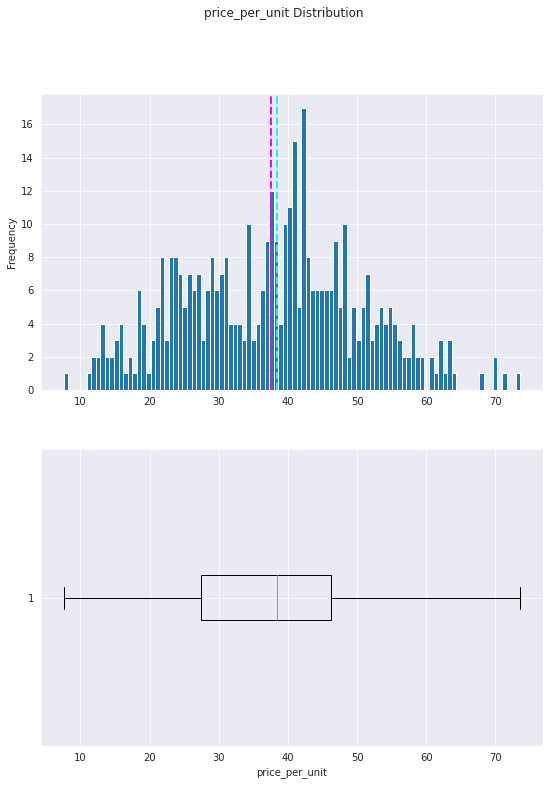

In [159]:
# Removing outliers from the price_per_unit column values
real_data = real_data[real_data['price_per_unit']<75]


p_p = real_data[real_data.columns[-1]]

fig, ax = plt.subplots(2, 1, figsize =(9,12))

ax[0].hist(p_p, bins=100)
ax[0].set_ylabel('Frequency')

# Add lines for the mean, median, and mode
ax[0].axvline(p_p.mean(), color='magenta', linestyle='dashed', linewidth=2)
ax[0].axvline(p_p.median(), color='cyan', linestyle='dashed', linewidth=2)

ax[1].boxplot(p_p, vert=False)
ax[1].set_xlabel('price_per_unit')

fig.suptitle('price_per_unit Distribution')

fig.show()

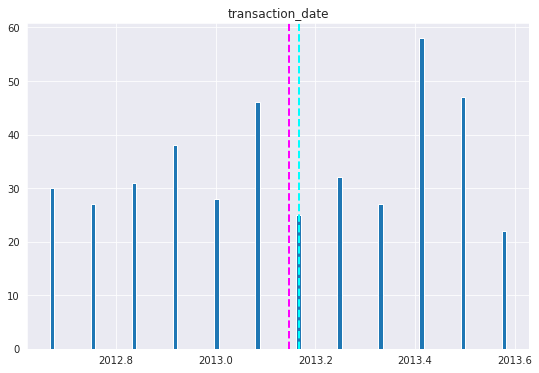

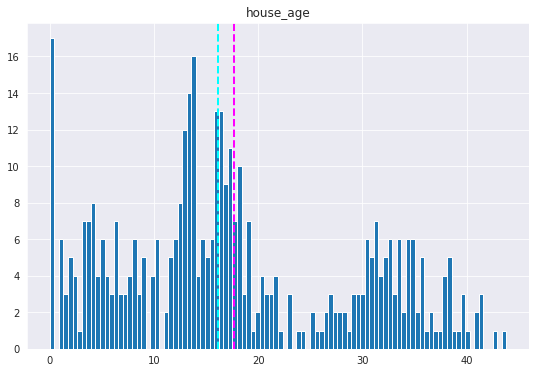

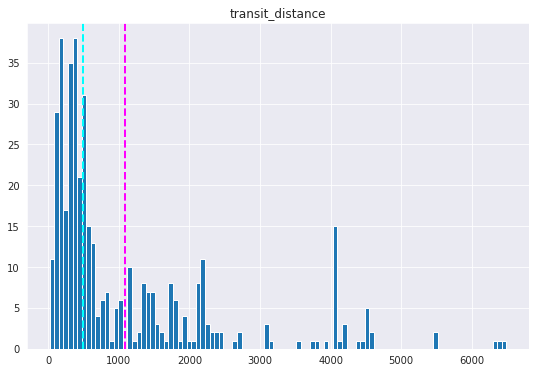

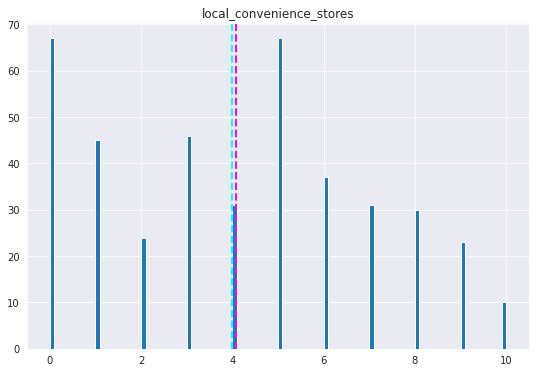

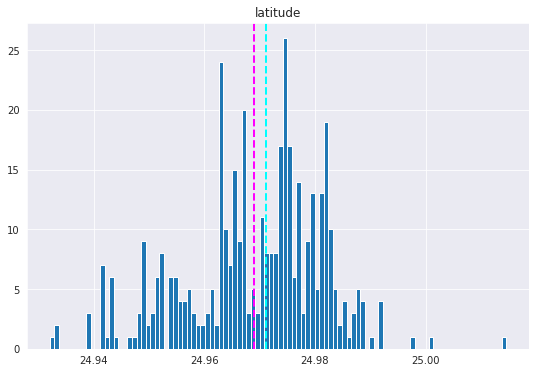

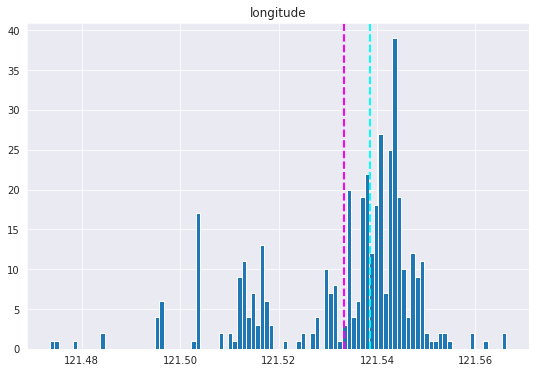

In [160]:
for col in real_data.columns[:-1]:
  fig = plt.figure(figsize=(9, 6))
  ax = fig.gca()
  feature = real_data[col]
  feature.hist(bins=100, ax = ax)
  ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
  ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)
  ax.set_title(col)
plt.show()

#### Relationships between the features and the Price_per_unit label we want to predict

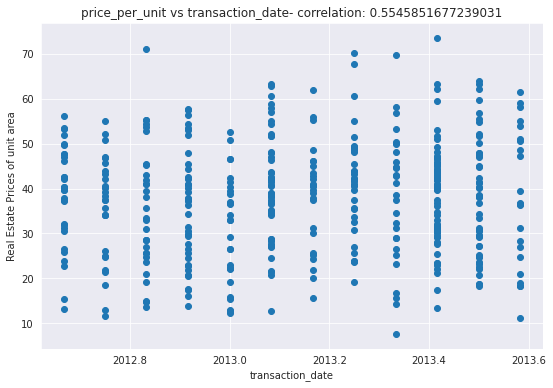

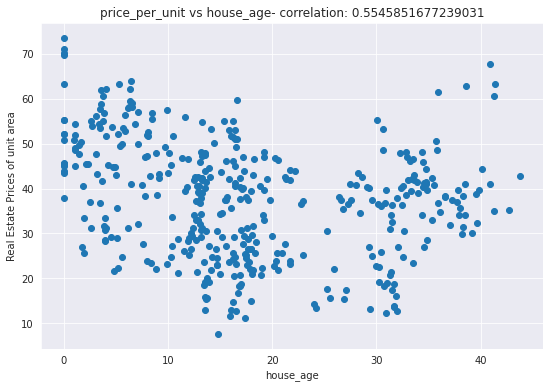

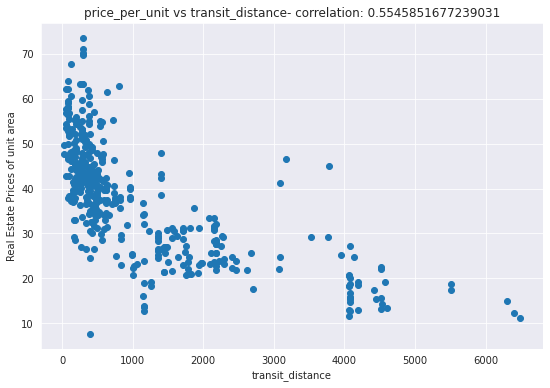

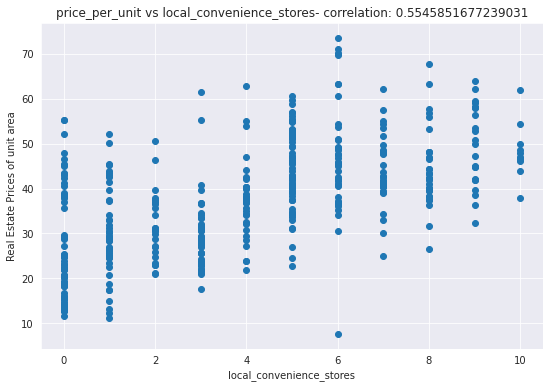

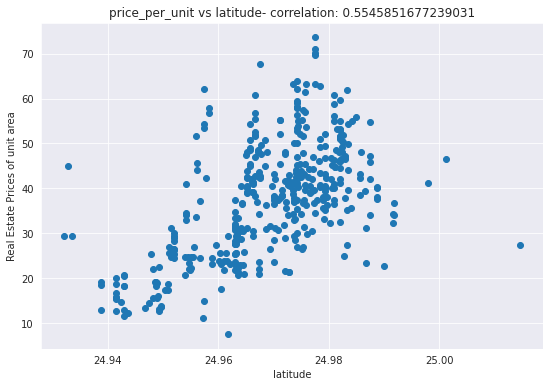

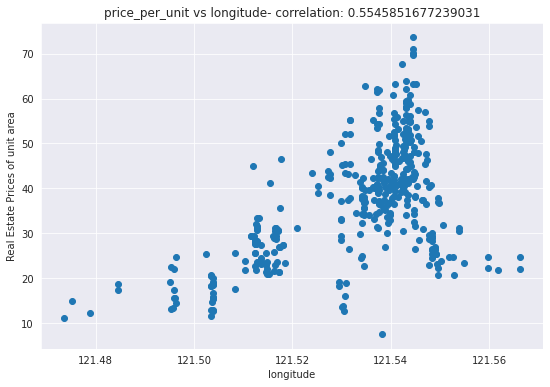

In [161]:
for col in real_data.columns[:-1]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    correlation = feature.corr(p_p)
    plt.scatter(x=real_data[col], y=real_data['price_per_unit'])
    plt.xlabel(col)
    plt.ylabel('Real Estate Prices of unit area')
    ax.set_title('price_per_unit vs ' + col + '- correlation: ' + str(correlation))
plt.show()

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


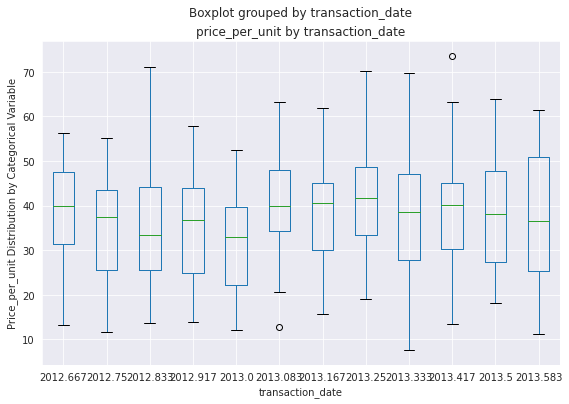

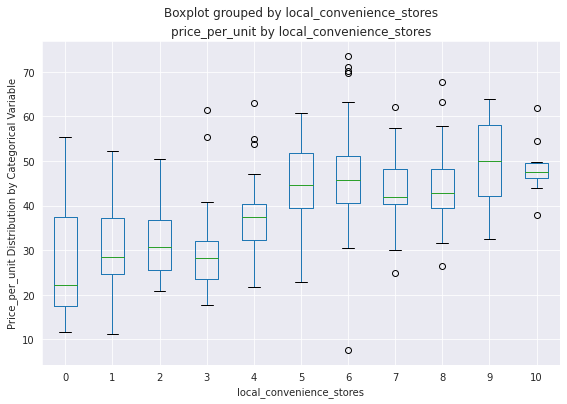

In [162]:
# plot a boxplot for the label(p_p) by each of transaction_date and local_convenience_stores features

for col in real_data[['transaction_date', 'local_convenience_stores']]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    real_data.boxplot(column = 'price_per_unit', by = col, ax = ax)
    ax.set_title('price_per_unit by ' + col)
    ax.set_ylabel("Price_per_unit Distribution by Categorical Variable")
plt.show()

Training the model

In [163]:
# Separate features and labels
x, y = real_data[real_data.columns[1:-1]].values, real_data[real_data.columns[-1]].values

from sklearn.model_selection import train_test_split

# Split data 70%-30% into training set and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=0)

print ('Training Set: %d, rows\nTest Set: %d rows' % (x_train.shape[0], x_test.shape[0]))

Training Set: 287, rows
Test Set: 124 rows


Preprocess the data and train a model in a pipeline and test the performance of the model on the test dataset using the root mean square error (RMSE) which determines the accuracy of the model

1. Using Linear Regression algorithm
2. Random forest Regression algorithm

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [0, 1, 3, 4])])),
                ('regressor', LinearRegression())])
MSE: 63.20003352514682
RMSE: 7.949844874281939
R2: 0.5529639808726132


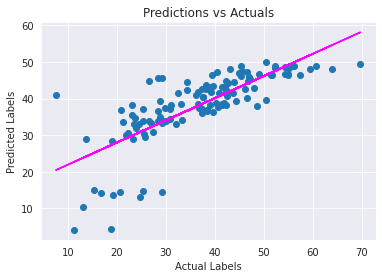

In [164]:
# Train the model
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.linear_model import LinearRegression
import numpy as np

# Define preprocessing for numeric columns (scale them)
numeric_features = [0,1,3,4]
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
    ])

# Create preprocessing and training pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', LinearRegression())])


# fit the pipeline to train a linear regression model on the training set
model = pipeline.fit(x_train, (y_train))
print (model)

from sklearn.metrics import mean_squared_error, r2_score

# Get predictions
predictions = model.predict(x_test)

mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Predictions vs Actuals')
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [0, 1, 3, 4])])),
                ('regressor', RandomForestRegressor())])
MSE: 30.47090615148288
RMSE: 5.520045846864216
R2: 0.7844685860847973


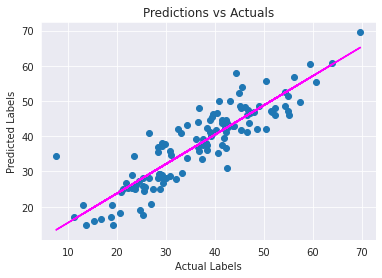

In [165]:
# Train the model
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Define preprocessing for numeric columns (scale them)
numeric_features = [0,1,3,4]
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
    ])

# Create preprocessing and training pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', RandomForestRegressor())])


# fit the pipeline to train a linear regression model on the training set
model1 = pipeline.fit(x_train, (y_train))
print (model1)

# Get predictions
predictions = model1.predict(x_test)

mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Predictions vs Actuals')
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

Saving the trained model, then using it to predict the price-per-unit for the following real estate transactions
   
    |2013.167|16.2|289.3248|5|24.98203|121.54348|,
    |2013.000|13.6|4082.015|0|24.94155|121.50381|

In [166]:
import joblib

# Save the linear regression model as a pickle file
filename = './real_estate_model.pkl'
joblib.dump(model, filename)

# Load the model from the file
loaded_model = joblib.load(filename)

# An array of features for each transaction
x_new = np.array([[16.2,289.3248,5,24.98203,121.54348],
                  [13.6,4082.015,0,24.94155,121.5038]])

# Use the model to predict unit price
result = loaded_model.predict(x_new)
print('Predictions for price_per_unit area'.format(np.round(result[0])))
for prediction in result:
    print(round(prediction,2))

Predictions for price_per_unit area
46.3
15.05


In [167]:
import joblib

# Save the random forest regressor model as a pickle file
filename = './real_estate_model.pkl'
joblib.dump(model1, filename)

# Load the model from the file
loaded_model1 = joblib.load(filename)

# An array of features for each transaction
x_new = np.array([[16.2,289.3248,5,24.98203,121.54348],
                  [13.6,4082.015,0,24.94155,121.5038]])

# Use the model to predict unit price
result = loaded_model1.predict(x_new)
print('Predictions for price_per_unit area'.format(np.round(result[0])))
for prediction in result:
    print(round(prediction,2))

Predictions for price_per_unit area
47.08
16.06
